In [1]:
import numpy as np
import networkx as nx
from wl_utils import *

In [2]:
from collections import defaultdict
from tqdm.notebook import tqdm

In [3]:
# Code that should make matplotlib use ACM font (libertine)
import matplotlib

rc_fonts = {
    "font.family": "serif",
    "font.size": 20,
    'figure.figsize': (5, 3),
    "text.usetex": True,
    'text.latex.preamble': 
        r"""
        \usepackage{libertine}
        \usepackage[libertine]{newtxmath}
        """,
}
matplotlib.rcParams.update(rc_fonts)

# Find graphs with identical wl coloring
Find example in which the final wl-coloring is not the same graph

In [4]:
Graphs = nx.readwrite.read_graph6("../datasets/graph7c.g6")

In [5]:
wl_dict = defaultdict(list)

In [6]:
for i, g in enumerate(tqdm(Graphs)):
    #pr = tuple(sorted(list(nx.pagerank(g).values())))
    wl = tuple(sorted(weisfeiler_lehman(g)[0]))
    wl_dict[wl].append(i)

In [7]:
list(sorted(map(len, wl_dict.values()),reverse=True))[:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [8]:
len(wl_hash.hash_dict)

4271

In [9]:
keys = []
for key, val in wl_dict.items():
    if len(val)>1:
        keys.append(key)      
    

In [10]:
for index in wl_dict[keys[0]]:
    print(keys[0], index)
    g = Graphs[index]
    print(weisfeiler_lehman(g))

(177, 177, 177, 177, 181, 181, 717) 241
(array([177, 177, 717, 177, 177, 181, 181]), 2, [{1}, {18, 6}, {74, 54, 119}], [array([1, 1, 1, 1, 1, 1, 1]), array([ 6,  6,  6,  6,  6, 18, 18]), array([119, 119,  54, 119, 119,  74,  74])])
(177, 177, 177, 177, 181, 181, 717) 264
(array([177, 177, 717, 177, 177, 181, 181]), 2, [{1}, {18, 6}, {74, 54, 119}], [array([1, 1, 1, 1, 1, 1, 1]), array([ 6,  6,  6,  6,  6, 18, 18]), array([119, 119,  54, 119, 119,  74,  74])])


In [11]:
def weisfeiler_lehman(graph1: nx.Graph, iterations=-1, early_stopping=True, hash=wl_hash):
    if iterations == -1:
        iterations = len(graph1)

    Gamma1 = np.ones(len(graph1), dtype=int)
    set_colors_by_iteration = []
    colors_by_iteration = []

    for t in range(iterations):
        tmp_Gamma1 = np.copy(Gamma1)
        colors_by_iteration.append(deepcopy(Gamma1))
        set_colors_by_iteration.append(set(Gamma1))
        for node in graph1.nodes:
            Gamma1[node] = hash.apply((Gamma1[node], tuple(sorted([tmp_Gamma1[n] for n in graph1[node]]))))
        if is_equivalent(Gamma1, tmp_Gamma1) and early_stopping:
            return Gamma1, t, set_colors_by_iteration, colors_by_iteration

    colors_by_iteration.append(deepcopy(Gamma1))
    set_colors_by_iteration.append(set(Gamma1))
    return Gamma1, iterations, set_colors_by_iteration, colors_by_iteration

In [12]:
import matplotlib.pyplot as plt
import numpy as np

340
num iterations 3	key_index 3


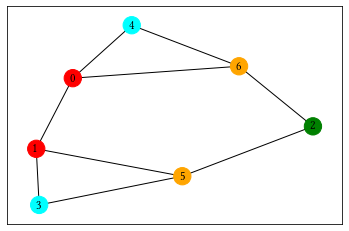

449
num iterations 3	key_index 3


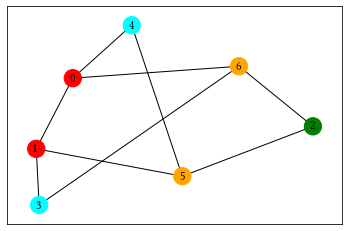

653
num iterations 3	key_index 11


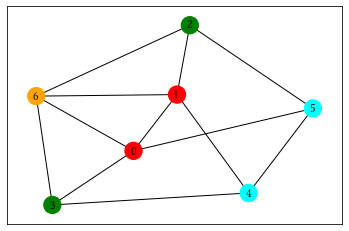

768
num iterations 3	key_index 11


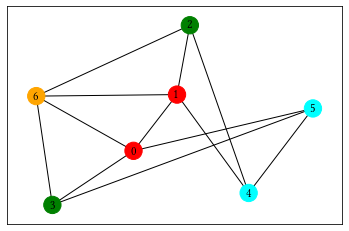

In [13]:


color_list = ["red", "green", "cyan", "orange", "purple", "white", "grey", "fuchsia" ]
# 2
for j in range(len(keys)):
    draw_layout = None
    for index in wl_dict[keys[j]]:
        
        g = Graphs[index]
        t = weisfeiler_lehman(g)[1]
        if t<3:
            continue
        print(index)
        print(f"num iterations {t}\tkey_index {j}")
        colors = tuple(weisfeiler_lehman(g)[0])
        order = np.argsort(colors)
        #print("colors", colors)
        mapping = {key: value for key, value in zip(order, g.nodes)}
        #print(mapping)
        g=nx.relabel_nodes(g, mapping)

        if draw_layout is None:
            wl_colors = np.unique(tuple(weisfeiler_lehman(g)[0]))
            draw_layout = nx.spring_layout(g, seed = 2)
            color_map = {wl_id : color_name for wl_id, color_name in zip(wl_colors, color_list)}
        #print("layout ", layout)
        colors2 = tuple(weisfeiler_lehman(g)[0])
        #print(g.nodes, colors2)


        this_color_list = [color_map[colors2[n]] for n in g.nodes]
        #print(layout)
        nx.draw_networkx(g, pos=draw_layout, node_color = this_color_list)
        plt.show()
        

## Given a graph find the other graphs that have the same earlier colors

In [14]:
target_index = 340

In [15]:
_, _, _, target_colors = weisfeiler_lehman(Graphs[target_index])

In [16]:
def to_sorted_colors(colors):
    for i in range(len(colors)):
        colors[i] = tuple(sorted(colors[i]))

In [17]:
to_sorted_colors(target_colors)

In [18]:
from collections import Counter
def to_partition(color):
    C = Counter(color)
    mapping = {key : i for i, (key, count) in enumerate(C.most_common())}
    return tuple(sorted(map(mapping.get, color)))

In [19]:
to_partition(target_colors[0])

(0, 0, 0, 0, 0, 0, 0)

In [20]:
# initial coloring is not needed, so ignore it
target_colors = target_colors[1:]

In [21]:
# collect graphs that have the same Wl colors as the target graph

similars = [set() for _ in range(len(target_colors))]

for i, g in enumerate(tqdm(Graphs)):
    #pr = tuple(sorted(list(nx.pagerank(g).values())))
    final_color, _, _, colors = weisfeiler_lehman(g)
    colors.append(final_color)
    colors = colors[1:]
    to_sorted_colors(colors)
    
    for j,(color, target) in enumerate(zip(colors, target_colors)):
        if color==target:
            similars[j].add(i)

In [22]:
similars[0]

{340, 348, 362, 366, 445, 449, 589, 590, 592, 727}

In [23]:
similars[1]

{340, 366, 449}

In [24]:
similars[2]

{340, 449}

In [25]:
arr=np.vstack((target_colors[0], target_colors[1]))
arr

array([[  6,   6,   6,  18,  18,  18,  18],
       [ 54,  54,  54, 284, 284, 300, 300]])

In [26]:
np.lexsort(arr)

array([0, 1, 2, 3, 4, 5, 6])

In [27]:
from pathlib import Path

In [28]:
g_target = Graphs[target_index]
largest_index=3
draw_layout = nx.kamada_kawai_layout(g_target)#nx.spring_layout(g_target, seed = 0)

In [29]:
print(draw_layout)
arr = np.zeros((len(draw_layout), 2))
print(arr.shape)
for key, value in draw_layout.items():
    arr[key,:]=value
    
_min = arr.min(axis=0)
_max = arr.max(axis=0)

arr[:,0]=(arr[:,0]-_min[0])/(_max[0]-_min[0])
arr[:,1]=(arr[:,1]-_min[1])/(_max[1]-_min[1])
for key, value in enumerate(arr):
    draw_layout[key]=value.ravel()-0.5
print(draw_layout)
node_layout={
    0:[-1.5,-0.7],
    1:[0,-1],
    2:[-1.5,0.7],
    3:[-0.5,0],
    4:[1.5,-0.4],
    5:[0,1],
    6:[1.5,0.4],
}
draw_layout = {key: node_layout[x] for key, x in enumerate([3, 5, 1, 0, 2, 4, 6])}


{0: array([-0.34202999, -0.38575657]), 1: array([0.66410392, 0.06703372]), 2: array([-0.33694513,  0.95186465]), 3: array([-0.13992786, -1.        ]), 4: array([0.2232601 , 0.62551018]), 5: array([ 0.34375868, -0.56827515]), 6: array([-0.41221971,  0.30962317])}
(7, 2)
{0: array([-0.43478753, -0.18530429]), 1: array([0.5       , 0.04667403]), 2: array([-0.43006324,  0.5       ]), 3: array([-0.24701675, -0.5       ]), 4: array([0.09041705, 0.33279862]), 5: array([ 0.2023709 , -0.27881415]), 6: array([-0.5       ,  0.17096003])}


In [30]:
edge_width = 6
with_labels=True
node_size=400

In [163]:
#color_list = ["lightsalmon", "paleturquoise", "salmon", "lightskyblue", "aquamarine", "orangered", "deepskyblue", "springgreen", "sienna" ]

#"navajowhite"
color_list = ["peachpuff", "paleturquoise", "salmon", "dodgerblue", "mediumaquamarine", "red", "mediumblue", "darkgreen", "sienna" ]
def get_color_maps(target_colors, color_list):
    """Assigns each wl_id in target_colors a named-color from the color_list"""
    color_maps = []
    
    num_used_colors = 0
    for color_index in range(len(target_colors)):
        wl_colors = target_colors[color_index] #np.unique(tuple(weisfeiler_lehman(g_target)[0]))
        wl_colors = list(sorted(set(wl_colors)))
        print(wl_colors)
        assert len(color_list[num_used_colors:])>=len(wl_colors)
        color_map = {wl_id : color_name for wl_id, color_name in zip(wl_colors, color_list[num_used_colors:])}
        print(color_map)
        num_used_colors+=len(color_map)
        color_maps.append(color_map)
    return color_maps

In [164]:
target_colors

[(6, 6, 6, 18, 18, 18, 18),
 (54, 54, 54, 284, 284, 300, 300),
 (710, 1426, 1426, 1679, 1679, 1680, 1680)]

In [165]:
color_maps = get_color_maps(target_colors, color_list)

[6, 18]
{6: 'peachpuff', 18: 'paleturquoise'}
[54, 284, 300]
{54: 'salmon', 284: 'dodgerblue', 300: 'mediumaquamarine'}
[710, 1426, 1679, 1680]
{710: 'red', 1426: 'mediumblue', 1679: 'darkgreen', 1680: 'sienna'}


449
[3, 5, 1, 0, 2, 4, 6] (6, 6, 6, 18, 18, 18, 18)


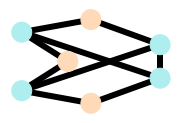

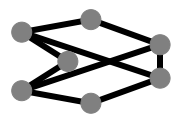

362
[1, 3, 4, 2, 0, 5, 6] (6, 6, 6, 18, 18, 18, 18)


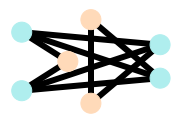

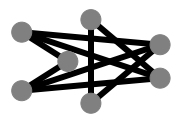

589
[4, 1, 3, 5, 0, 2, 6] (6, 6, 6, 18, 18, 18, 18)


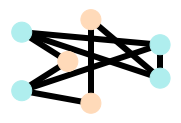

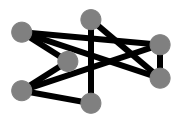

366
[5, 0, 1, 2, 3, 4, 6] (6, 6, 6, 18, 18, 18, 18)


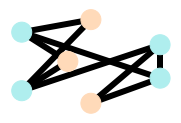

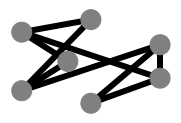

590
[3, 4, 0, 5, 1, 2, 6] (6, 6, 6, 18, 18, 18, 18)


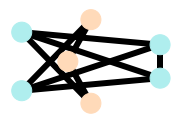

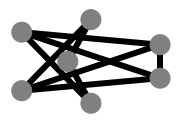

592
[3, 4, 5, 0, 1, 2, 6] (6, 6, 6, 18, 18, 18, 18)


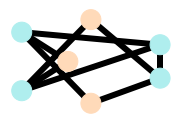

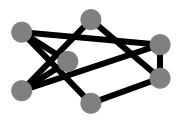

340
[5, 0, 1, 2, 3, 4, 6] (6, 6, 6, 18, 18, 18, 18)


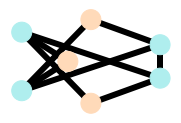

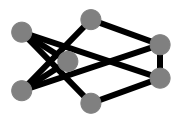

727
[4, 3, 5, 1, 0, 2, 6] (6, 6, 6, 18, 18, 18, 18)


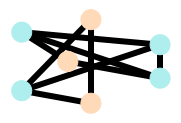

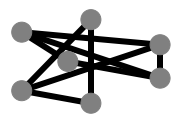

348
[3, 5, 1, 0, 2, 4, 6] (6, 6, 6, 18, 18, 18, 18)


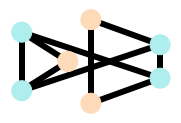

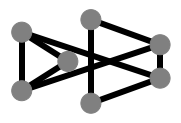

445
[4, 0, 1, 2, 5, 3, 6] (6, 6, 6, 18, 18, 18, 18)


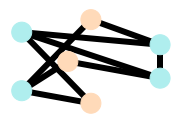

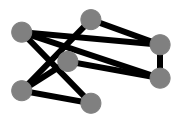

449
[3, 5, 1, 0, 2, 4, 6] (54, 54, 54, 284, 284, 300, 300)


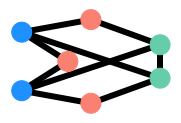

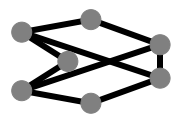

340
[5, 0, 1, 2, 3, 4, 6] (54, 54, 54, 284, 284, 300, 300)


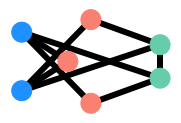

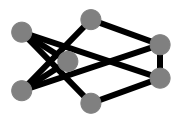

366
[5, 0, 1, 2, 3, 4, 6] (54, 54, 54, 284, 284, 300, 300)


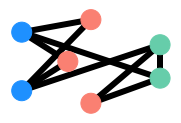

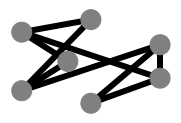

449
[3, 5, 1, 0, 2, 4, 6] (710, 1680, 1680, 1426, 1426, 1679, 1679)


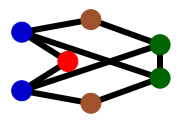

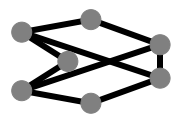

340
[5, 0, 1, 2, 3, 4, 6] (710, 1680, 1680, 1426, 1426, 1679, 1679)


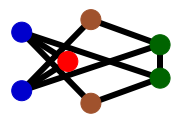

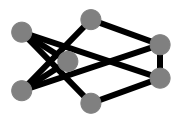

In [166]:

for color_index in range(3):
    others = similars[color_index]
    color_map = color_maps[color_index]
    #order = np.argsort(colors)
    #print("colors", colors)
    #mapping = {key: value for key, value in zip(order, g.nodes)}

    for index in list(others):#[0:1]:
        g = Graphs[index]
        print(index)
        final_coloring, _, _, colors = weisfeiler_lehman(g)
        
        colors = np.array(colors[1:largest_index]+[final_coloring])[::-1,:]
        order = np.lexsort(colors)
        #print(colors[:, order])
        
        mapping = {key : value for key, value in zip(order, g.nodes)}
        #print(mapping)
        g=nx.relabel_nodes(g, mapping)

        colors2 = tuple(weisfeiler_lehman(g)[3][color_index+1])
        print(g.nodes, colors2)


        this_color_list = [color_map[colors2[n]] for n in g.nodes]
        def do_plot(node_colors, suffix=""):
            fig, ax = plt.subplots(figsize=(3,2))
            nx.draw(g, 
                             pos=draw_layout,
                             node_color = node_colors,
                             width=edge_width,
                             node_size=node_size,
                             with_labels=False,
                             ax=ax
                            )
            ax.set_ylim(-1.3,1.3)
            p = Path(f"./images/{target_index}")
            p.mkdir(parents=True, exist_ok=True)
            plt.savefig(p/f"{color_index}_{index}{suffix}.pdf", bbox_inches="tight")
            plt.show()
        
        do_plot(this_color_list)
        do_plot(["gray" ]*len(this_color_list), suffix="_gray")

In [169]:
target_colors

[(6, 6, 6, 18, 18, 18, 18),
 (54, 54, 54, 284, 284, 300, 300),
 (710, 1426, 1426, 1679, 1679, 1680, 1680)]

In [170]:
import numpy as np
def calc_tree_layout(T):
    max_depth = max(T.nodes.data()[n]["depth"] for n in T.nodes)

    #print(max_depth)
    #print(T.nodes.data())
    num_this_depth = 0
    next_nodes = set()
    for node in T.nodes:
        if T.nodes.data()[node]["depth"]==0:
            T.nodes.data()[node]["pos"]=num_this_depth
            num_this_depth+=1
            next_nodes.add(node)
        else:
            T.nodes.data()[node]["prev_pos"]=[]

    new_nodes = set()
    while next_nodes:
        new_nodes.clear()
        for node in next_nodes:
            for pred in T.successors(node):
                T.nodes.data()[pred]["prev_pos"].append(T.nodes.data()[node]["pos"])
                new_nodes.add(pred)
        for node in new_nodes:
            T.nodes.data()[node]["pos"]=np.mean(T.nodes.data()[node]["prev_pos"])
        next_nodes = new_nodes.copy()
        #print(next_nodes)
    #print(T.nodes.data())
    pos_dict = {}
    for i, node in enumerate(T.nodes):
        T.nodes.data()[node]["tree_depth"] = max_depth - T.nodes.data()[node]["depth"]
        pos_dict[i] = [T.nodes.data()[node]["tree_depth"], T.nodes.data()[node]["pos"]]
    return pos_dict

In [171]:
def get_tree_colors(G, T, color_maps, wl_colors, initial_colors):
    max_depth = max(T.nodes.data()[n]["depth"] for n in T.nodes)
    print("wl_colors", wl_colors)
    
    new_color_maps=[]
    new_color_maps.append(initial_colors)
    new_color_maps.extend(color_maps)
    
    original_position = {node_id: i for i, node_id in enumerate(G.nodes)}
    
    colors = []
    for i, node in enumerate(T.nodes):
        
        depth = T.nodes.data()[node]["depth"]
        color_index = T.nodes.data()[node]["original_id"]#original_position[T.nodes.data()[node]["original_id"]]
        
        wl_color = wl_colors[depth][color_index]
        #print(color_index, wl_color)
        colors.append(new_color_maps[depth][wl_color])
    print("colors" ,colors)
    return colors

In [172]:
#def get_unraveling():
to_plot = []
for color_index in range(3):
    others = similars[color_index]
    for index in list(others)[0:1]:
        g = Graphs[index]
        print(index)
        final_coloring, _, _, colors = weisfeiler_lehman(g)

        colors = np.array(colors[1:largest_index]+[final_coloring])[::-1,:]
        order = np.lexsort(colors)
        #print(colors[:, order])

        mapping = {key : value for key, value in zip(order, g.nodes)}
        #print(mapping)
        g=nx.relabel_nodes(g, mapping)

        colors2 = tuple(weisfeiler_lehman(g)[3][color_index+1])
        print(g.nodes, colors2)
        
        nodes_by_color = defaultdict(list)
        for node, color in zip(g.nodes, colors2):
            nodes_by_color[color].append(node)

        def add_nodes_recursively(G, T, root, parent_t, depth):
            new_node_t = len(T.nodes)
            T.add_node(new_node_t, depth=depth, original_id=root)
            if parent_t is not None:
                T.add_edge(new_node_t, parent_t)
            if depth > 0:
                for neighbor in G.neighbors(root):
                    add_nodes_recursively(G, T, neighbor, new_node_t, depth-1)
                    
        def add_nodes_BFS(G, T, roots, parent_ts, depth):
            new_node_ts = []
            for root, parent_t in zip(roots, parent_ts):
                new_node_t = len(T.nodes)
                T.add_node(new_node_t, depth=depth, original_id=root)
                if parent_t is not None:
                    T.add_edge(new_node_t, parent_t)
                new_node_ts.append(new_node_t)
            if depth > 0:
                new_roots = []
                new_node_ts_dup = [] 
                for root, new_node_t in zip(roots, new_node_ts):
                    for neighbor in G.neighbors(root):
                        new_roots.append(neighbor)
                        new_node_ts_dup.append(new_node_t)
                        
                add_nodes_BFS(G, T, new_roots, new_node_ts_dup, depth-1)
        Ts = []
        for color, nodes in nodes_by_color.items():
            T = nx.DiGraph()    
            add_nodes_BFS(g, T, [nodes[0]], [None], color_index+1)
            Ts.append(T)
        for T in Ts:
            pos_dict = calc_tree_layout(T)
            node_colors=get_tree_colors(g, T, color_maps, weisfeiler_lehman(g)[3], {1:"gray"})
            to_plot.append((T, pos_dict, node_colors))

            continue

            #break

449
[3, 5, 1, 0, 2, 4, 6] (6, 6, 6, 18, 18, 18, 18)
wl_colors [array([1, 1, 1, 1, 1, 1, 1]), array([ 6,  6,  6, 18, 18, 18, 18]), array([ 54,  54,  54, 284, 284, 300, 300]), array([ 710, 1680, 1680, 1426, 1426, 1679, 1679])]
colors ['paleturquoise', 'gray', 'gray', 'gray']
wl_colors [array([1, 1, 1, 1, 1, 1, 1]), array([ 6,  6,  6, 18, 18, 18, 18]), array([ 54,  54,  54, 284, 284, 300, 300]), array([ 710, 1680, 1680, 1426, 1426, 1679, 1679])]
colors ['peachpuff', 'gray', 'gray']
449
[3, 5, 1, 0, 2, 4, 6] (54, 54, 54, 284, 284, 300, 300)
wl_colors [array([1, 1, 1, 1, 1, 1, 1]), array([ 6,  6,  6, 18, 18, 18, 18]), array([ 54,  54,  54, 284, 284, 300, 300]), array([ 710, 1680, 1680, 1426, 1426, 1679, 1679])]
colors ['dodgerblue', 'peachpuff', 'peachpuff', 'paleturquoise', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray']
wl_colors [array([1, 1, 1, 1, 1, 1, 1]), array([ 6,  6,  6, 18, 18, 18, 18]), array([ 54,  54,  54, 284, 284, 300, 300]), array([ 710, 1680, 1680, 1426, 1426, 1679

In [173]:
plots_by_node = defaultdict(list)
for (T, pos_dict, node_colors) in to_plot:
    # node 0 is assumed to always be the root
    key = T.nodes().data()[0]["original_id"]
    print(key)
    plots_by_node[key].append((T, pos_dict, node_colors))

3
0
3
0
4
3
5
0
4


3
0 3 3


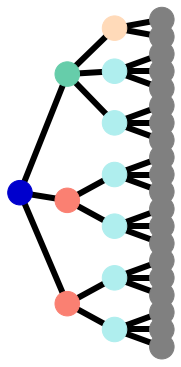

0 3 3


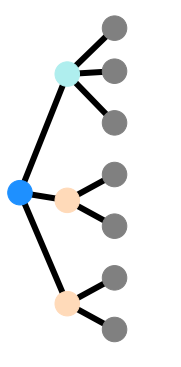

0 3 3


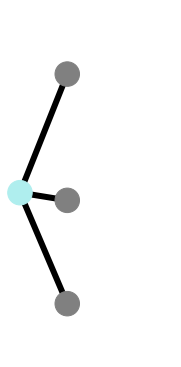

0
0 3 3


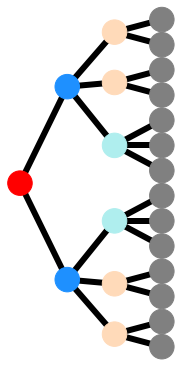

0 3 3


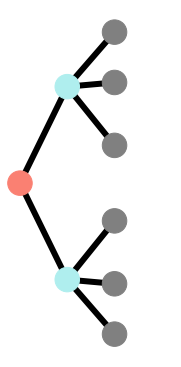

0 3 3


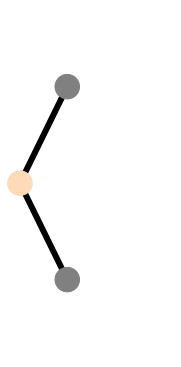

4
0 3 3


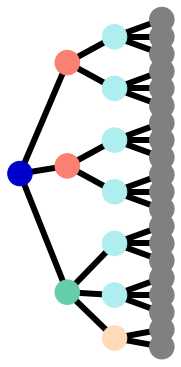

0 3 3


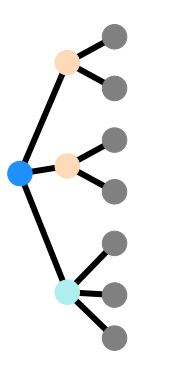

5
0 3 3


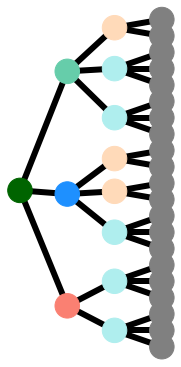

In [174]:
for key, to_plot_list in plots_by_node.items():
    print(key)
    for i, (T, pos_dict, node_colors) in enumerate(reversed(to_plot_list)):
        if i == 0: 
            pos_dict_x = pos_dict
        pos_dict=pos_dict_x
        
        figsize = (3,6.5)
        fig, ax = plt.subplots(figsize=figsize)
        nx.draw(T.to_undirected(),
                pos=pos_dict,                             
                width=edge_width,
                node_size=1.5*node_size,
                node_color = node_colors,ax=ax)
        y_min = min([val[1] for val in pos_dict.values()])
        y_max = max([val[1] for val in pos_dict.values()])
        delta=y_max-y_min
        
        x_min = min([val[0] for val in pos_dict.values()])
        x_max = max([val[0] for val in pos_dict.values()])
        x_delta=x_max-x_min
        # saving the figure
        p = Path(f"./images/unravelings")
        if figsize[1]>figsize[0]:
            suffix="_wide"
        else:
            suffix=""
        p.mkdir(parents=True, exist_ok=True)
        f = 0.04
        ax.set_ylim(y_min-f*delta, y_max+f*delta)
        print(x_min, x_max, x_delta)
        f2 = 0.09
        ax.set_xlim(x_min-f2*x_delta, x_max+f2*x_delta)
        #ax.set_facecolor('xkcd:salmon')
        #fig.patch.set_facecolor('black')
        plt.savefig(p/f"{node_colors[0]}{suffix}.pdf", bbox_inches="tight")
        plt.show()